# Dataset

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Coding_study/data/penguins.csv',index_col=0)
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [5]:
# Shape of data
df.shape

(344, 8)

In [6]:
# 결측치 확인
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [7]:
# 결측치 제거
df = df.dropna().reset_index(drop=True)

In [8]:
# 결측치 확인
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64

연도 변수는 독립 변수에서 제외

In [9]:
df = df.iloc[:,:-1]
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male


In [10]:
df.shape

(333, 7)

In [11]:
# Convert categorical variable into dummy

island_dummies = pd.get_dummies(df.island)
sex_dummies = pd.get_dummies(df.sex)

In [12]:
island_dummies.head()

,Biscoe,Dream,Torgersen
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


## Concatenate dataframe

In [13]:
df = pd.concat([df,island_dummies,sex_dummies],axis=1)
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,Biscoe,Dream,Torgersen,female,male
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,0,0,1,0,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,0,0,1,1,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,0,0,1,1,0
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,0,0,1,1,0
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,0,0,1,0,1


In [14]:
df = df.drop(['island','sex'],axis=1)
df.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,Biscoe,Dream,Torgersen,female,male
0,Adelie,39.1,18.7,181.0,3750.0,0,0,1,0,1
1,Adelie,39.5,17.4,186.0,3800.0,0,0,1,1,0
2,Adelie,40.3,18.0,195.0,3250.0,0,0,1,1,0
3,Adelie,36.7,19.3,193.0,3450.0,0,0,1,1,0
4,Adelie,39.3,20.6,190.0,3650.0,0,0,1,0,1


In [15]:

df.shape

(333, 10)

## Labels

In [16]:
df.species.value_counts()

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

In [17]:
# 문자열 형태를 정수형으로 변환
def make_int(s):
  if s == 'Adelie':
    return 0
  elif s == 'Gentoo':
    return 1
  else:
    return 2

In [18]:
df['species'] = df.species.apply(make_int)

In [19]:
df.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,Biscoe,Dream,Torgersen,female,male
0,0,39.1,18.7,181.0,3750.0,0,0,1,0,1
1,0,39.5,17.4,186.0,3800.0,0,0,1,1,0
2,0,40.3,18.0,195.0,3250.0,0,0,1,1,0
3,0,36.7,19.3,193.0,3450.0,0,0,1,1,0
4,0,39.3,20.6,190.0,3650.0,0,0,1,0,1


나중에 one-hot encoding을 위해서는 정수형으로 바꿔주어야 함

# Holdout

In [20]:
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf

In [23]:
np.set_printoptions(suppress=True)

In [21]:
x = df.iloc[:,1:].values
y = df.iloc[:,0]

In [24]:
x[0]

array([  39.1,   18.7,  181. , 3750. ,    0. ,    0. ,    1. ,    0. ,
          1. ])

In [25]:
y[0]

0

In [26]:
# One-hot encoding
y_one_hot = tf.keras.utils.to_categorical(y)

In [27]:
y_one_hot[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x,y_one_hot,test_size=0.1,shuffle=True)

In [29]:
print('Shape of x train : ',x_train.shape)
print('Shape of x test : ',x_test.shape)
print('Shape of y train : ',y_train.shape)
print('Shape of y test : ',y_test.shape)

Shape of x train :  (299, 9)
Shape of x test :  (34, 9)
Shape of y train :  (299, 3)
Shape of y test :  (34, 3)


## Scaling

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
scaler = StandardScaler()

In [32]:
x_train[:,:-5]

array([[  46.5,   14.4,  217. , 4900. ],
       [  49.8,   16.8,  230. , 5700. ],
       [  58. ,   17.8,  181. , 3700. ],
       ...,
       [  50.4,   15.3,  224. , 5550. ],
       [  50.5,   15.9,  225. , 5400. ],
       [  50.8,   15.7,  226. , 5200. ]])

In [33]:
scaler.fit(x_train[:,:-5])

StandardScaler()

In [34]:
x_train_std = scaler.transform(x_train[:,:-5])
x_test_std = scaler.transform(x_test[:,:-5])

In [35]:
x_train_std[0]

array([ 0.4796206 , -1.39865844,  1.13143174,  0.84389361])

In [36]:
x_train_std = np.concatenate([x_train_std,x_train[:,-5:]],axis=1)
x_test_std = np.concatenate([x_test_std,x_test[:,-5:]],axis=1)

In [37]:
x_train_std[0]

array([ 0.4796206 , -1.39865844,  1.13143174,  0.84389361,  1.        ,
        0.        ,  0.        ,  1.        ,  0.        ])

In [38]:
x_test_std[0]

array([-0.56340274,  0.88880349,  0.49232956,  0.10574386,  0.        ,
        1.        ,  0.        ,  0.        ,  1.        ])

# Model

# Model

- 첫 번째 은닉층의 node 수는 256
- 두 번째 은닉층의 node 수는 128
- 두 번째 은닉층 이후에 Dropout 적용
- 모든 활성화 함수는 ReLU(분류 층 제외)

## Sequential

In [42]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input((9,)))
model.add(tf.keras.layers.Dense(256,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(3,activation='softmax'))

In [43]:
# 모형 요약
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 256)               2560      
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 3)                 387       
                                                                 
Total params: 35,843
Trainable params: 35,843
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [45]:
hist = model.fit(x_train_std,y_train,epochs=100,batch_size=32,validation_split=0.1)

Epoch 1/100
9/9 [==============================] - 1s 25ms/step - loss: 0.8362 - accuracy: 0.7063 - val_loss: 0.4534 - val_accuracy: 0.9000
Epoch 2/100
9/9 [==============================] - 0s 5ms/step - loss: 0.3755 - accuracy: 0.9442 - val_loss: 0.2203 - val_accuracy: 0.9667
Epoch 3/100
9/9 [==============================] - 0s 6ms/step - loss: 0.1720 - accuracy: 0.9703 - val_loss: 0.1147 - val_accuracy: 0.9667
Epoch 4/100
9/9 [==============================] - 0s 5ms/step - loss: 0.0773 - accuracy: 0.9926 - val_loss: 0.0592 - val_accuracy: 1.0000
Epoch 5/100
9/9 [==============================] - 0s 8ms/step - loss: 0.0482 - accuracy: 0.9963 - val_loss: 0.0351 - val_accuracy: 1.0000
Epoch 6/100
9/9 [==============================] - 0s 6ms/step - loss: 0.0308 - accuracy: 1.0000 - val_loss: 0.0234 - val_accuracy: 1.0000
Epoch 7/100
9/9 [==============================] - 0s 5ms/step - loss: 0.0237 - accuracy: 0.9963 - val_loss: 0.0188 - val_accuracy: 1.0000
Epoch 8/100
9/9 [=========

### 시각화

In [46]:
import matplotlib.pyplot as plt

In [48]:
print(hist.history)

{'loss': [0.8362103700637817, 0.3754787743091583, 0.17202821373939514, 0.07725347578525543, 0.048203255981206894, 0.030821286141872406, 0.023740336298942566, 0.01668517291545868, 0.014094131998717785, 0.01220455951988697, 0.010262920521199703, 0.010727030225098133, 0.009374594315886497, 0.01176160667091608, 0.007453936152160168, 0.0078811626881361, 0.008707026019692421, 0.003834447357803583, 0.009894398972392082, 0.005397436674684286, 0.007952125743031502, 0.005616741720587015, 0.005787264090031385, 0.009476919658482075, 0.006062972359359264, 0.004020575433969498, 0.0029582036659121513, 0.002358894795179367, 0.002779726404696703, 0.00643097935244441, 0.0026067879516631365, 0.0023859781213104725, 0.002876939484849572, 0.0027635092847049236, 0.0023145636077970266, 0.0022927101235836744, 0.002071650931611657, 0.0017167427577078342, 0.002732631517574191, 0.0028824997134506702, 0.00178434862755239, 0.005151586141437292, 0.004424692131578922, 0.003833103459328413, 0.003069545142352581, 0.002

In [49]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

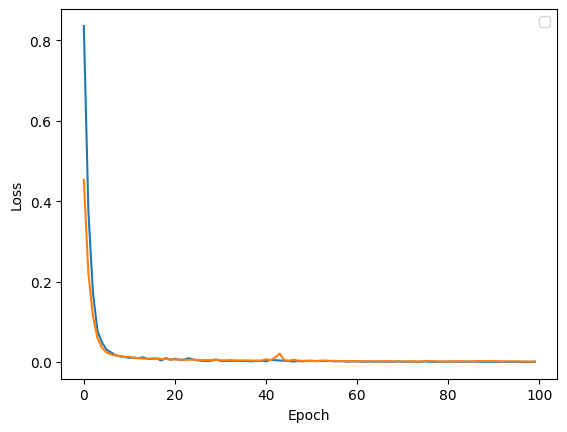

In [52]:
plt.figure()
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### 평가

첫 번째가 손실, 두 번째가 정확도

In [53]:
model.evaluate(x_test_std,y_test)

2/2 [==============================] - 0s 17ms/step - loss: 0.0088 - accuracy: 1.0000


[0.00878375768661499, 1.0]

### 추론

In [57]:
x_test_std[0].shape

(9,)

In [55]:
model.predict(x_test_std[0].reshape(1,9))

1/1 [==============================] - 0s 80ms/step


array([[0.9999975 , 0.00000191, 0.00000065]], dtype=float32)

## Funtional

Skip connection 등과 같이 층들과의 또 다른 관계식을 표현할 때는 단순히 연속적으로 층을 쌓아서는 할 수 없음. 이러한 부분을 해결하기 위해서는 기능적으로 층을 쌓아야함

In [58]:
inputs = tf.keras.layers.Input(9,)
h1 = tf.keras.layers.Dense(256,activation='relu')
h2 = tf.keras.layers.Dense(128,activation='relu')
output = tf.keras.layers.Dense(3,activation='softmax')

In [70]:
inputs = tf.keras.layers.Input(9,)
x1 = tf.keras.layers.Dense(256,activation='relu')(inputs)
x2 = tf.keras.layers.Dense(256,activation='relu')(inputs)
h = tf.keras.layers.Concatenate()([x1,x2])
output = tf.keras.layers.Dense(3,activation='softmax')(h)

In [71]:
model = tf.keras.models.Model(inputs,output)

In [72]:
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 9)]          0           []                               
                                                                                                  
 dense_22 (Dense)               (None, 256)          2560        ['input_11[0][0]']               
                                                                                                  
 dense_23 (Dense)               (None, 256)          2560        ['input_11[0][0]']               
                                                                                                  
 concatenate_5 (Concatenate)    (None, 512)          0           ['dense_22[0][0]',               
                                                                  'dense_23[0][0]']         

In [74]:
optim = tf.keras.optimizers.Adam(learning_rate=0.0001)

In [75]:
model.compile(optimizer=optim,loss='categorical_crossentropy',metrics=['acc'])

### Early stopping & Model checkpoint

- patience : 얼마나 오랫동안 변화가 없으면 학습을 멈출 것인지를 정하는 인자

- monitor : 어떠한 지표를 참고할 것인지
- mode : monitor로 관찰하는 지표가 최저일 때를 기준으로 볼 것인지, 최고를 기준으로 볼것인지

In [84]:
es = tf.keras.callbacks.EarlyStopping(patience=1,monitor='val_loss',mode='auto',verbose=1)
mc = tf.keras.callbacks.ModelCheckpoint('./sample.h5',monitor='val_loss',mode='auto',verbose=1)

In [85]:
model.fit(x_train_std,y_train,epochs=100,batch_size=32,validation_split=0.1,callbacks=[es,mc])

Epoch 1/100
1/9 [==>...........................] - ETA: 0s - loss: 0.0200 - acc: 1.0000
Epoch 1: saving model to ./sample.h5
9/9 [==============================] - 0s 21ms/step - loss: 0.0073 - acc: 1.0000 - val_loss: 0.0121 - val_acc: 1.0000
Epoch 2/100
1/9 [==>...........................] - ETA: 0s - loss: 0.0015 - acc: 1.0000
Epoch 2: saving model to ./sample.h5
9/9 [==============================] - 0s 15ms/step - loss: 0.0073 - acc: 1.0000 - val_loss: 0.0121 - val_acc: 1.0000
Epoch 3/100
1/9 [==>...........................] - ETA: 0s - loss: 0.0173 - acc: 1.0000
Epoch 3: saving model to ./sample.h5
9/9 [==============================] - 0s 15ms/step - loss: 0.0072 - acc: 1.0000 - val_loss: 0.0120 - val_acc: 1.0000
Epoch 4/100
1/9 [==>...........................] - ETA: 0s - loss: 0.0018 - acc: 1.0000
Epoch 4: saving model to ./sample.h5
9/9 [==============================] - 0s 12ms/step - loss: 0.0072 - acc: 1.0000 - val_loss: 0.0119 - val_acc: 1.0000
Epoch 5/100
1/9 [==>........

## 객체

### Gradient Tape

In [ ]:
loss_object = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()

In [ ]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.CategoricalAccuracy(name='train_accuracy')

In [ ]:
@tf.function
def train_step(model,inputs,labels,loss_object,optimizer,train_loss,train_metric):
  with tf.GradientTape() as tape:
    preds = model(inputs)
    loss = loss_object(labels,preds)
  gradients = tape.gradient(loss, model.trainable_variables)

  optimizer.apply_gradients(zip(gradients,model.trainable_variables))
  train_loss(loss)
  train_metric(labels,preds)


In [ ]:
for epoch in range(10):
  for x, label in train_ds:
    train_step(model,x,label,loss_object,optimizer,train_loss,train_accuracy)

  print('Epoch : {} Loss : {} Accuracy : {}'.format(epoch,train_loss.result(),train_accuracy.result()*100))

Epoch : 0 Loss : 0.011812306940555573 Accuracy : 99.33110809326172
Epoch : 1 Loss : 0.007976454682648182 Accuracy : 99.6655502319336
Epoch : 2 Loss : 0.008113743737339973 Accuracy : 99.6655502319336
Epoch : 3 Loss : 0.006807760801166296 Accuracy : 99.7491683959961
Epoch : 4 Loss : 0.006038080435246229 Accuracy : 99.79933166503906
Epoch : 5 Loss : 0.005408630706369877 Accuracy : 99.83277130126953
Epoch : 6 Loss : 0.004990162327885628 Accuracy : 99.85665893554688
Epoch : 7 Loss : 0.004604077897965908 Accuracy : 99.87458038330078
Epoch : 8 Loss : 0.004298255778849125 Accuracy : 99.88851928710938
Epoch : 9 Loss : 0.004038689658045769 Accuracy : 99.89966583251953
